### Neil Desai and Aditya Bhandari
### project 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataset

Our dataset is of wine reviews. The original dataset has 129971 records (each a particular wine), and after doing some cleaning and duplicate-removal we were left with 119988 records. The columns in this dataset are 'country' (the country the wine was produced in), 'description' (the review), 'designation' (the vineyard within the winery where the grapes that made the wine are from), 'points' (the number of points WineEnthusiast rated the wine on a scale of 1-100), 'price' (the cost for a bottle of the wine), 'province' (province/state the wine is from), 'region_1' (area in province or state that the wine is from), 'region_2' (sometimes there are more specific regions within the first area), 'taster_name' (the person that reviewed the wine), 'taster_twitter_handle' (the twitter handle of the reviewer), 'title' (the title of the wine review), 'variety' (the type of grapes used to make the wine), and 'winery' (the winery that produced the wine).

In [5]:
#reads tables

table = pd.read_csv("winemag-data-130k-v2.csv")
original = table.drop(table.columns[0], axis=1) # had its own index collimn, not needed
cols = ['country', 'description','designation','points','price','province','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery']
noDups = original.drop_duplicates(subset=cols,keep='first')
print(len(original))
print(len(noDups)) #removed aroud 10k duplicates

noDups.to_csv("noDuplicates.csv",encoding='UTF-8')

noDups.head()

129971
119988


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Initial Questions

The questions we originally thought of related to 3 areas:

1) how price corresponds to quality/score — does more expensive mean better wine?

2) varieties — what are the different varieties of wine, which are most common, which are more expensive, and which are better quality on average?

3) countries — which countries produce the most wine, which produced the highest scoring wine on average, and which produce the highest price wine on average? how do these intersect, if at all?

We first plotted every wine on the axes of price and points, to get an idea of the general correlation that might exist and tried to plot a line of best fit as well.

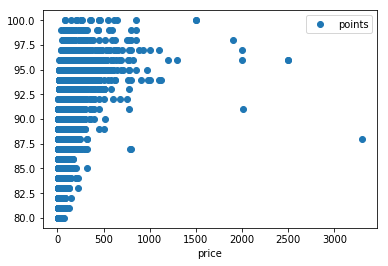

In [21]:
noDups.plot(x='price', y='points', style='o')

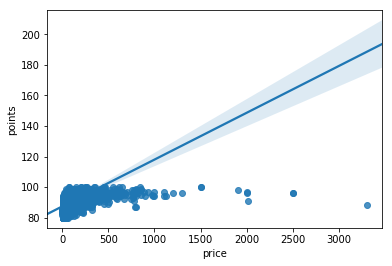

In [22]:
import seaborn as sns
sns.regplot(noDups['price'], noDups['points'])

After this, we used Tableau to visualize the plot.

![Price vs Points](img/6.png)

The previous visualization was hard to see a trend in, so we seperated the data into 'buckets' ($10 ranges) and visualized it in Tableau.

In [23]:
#groups by price and shows count and avg score
priceBucket = noDups
priceBucket['priceBucket'] = [(x//10)*10 for x in priceBucket['price']]
priceBucket.sort_values('priceBucket', ascending = False)
df = priceBucket.groupby('priceBucket').agg({'country':'count','points':'mean'})
df.columns = ['count','avg score']
df.to_csv("priceBucket.csv",encoding='UTF-8')

/Users/neil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


![Price vs Points](img/7.png)

We wanted to examine the wines by country, first looking at what the countries that produced the most wine were.

In [54]:
y = noDups.groupby(['country']).agg({'country':'count'}).sort_values(by=['country'], ascending=False)
y.columns = ['count']
y.head()

/Users/neil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,count
country,
US,50457
France,20353
Italy,17940
Spain,6116
Portugal,5256


After this, we used Tableau to visualize the count (of wines) for each country on a map.

![Count of wines produced in each country](img/1.png)

We then examined which countries had the highest average scores.

In [55]:
countdf = noDups.groupby(['country']).agg({'points':'mean', 'country':'count'}).sort_values(by=['country'], ascending=False)
x = countdf.sort_values(by=['points'], ascending=False).head()
x.columns = ['avg points','count']
x

/Users/neil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,avg points,count
country,,
England,91.746032,63
India,90.250000,8
Austria,90.129532,3034
Germany,89.895582,1992
Canada,89.309735,226


However, we noticed that some countries like India and England that had very few records in the dataset were showing up in the top 5. We then redid our last step but filtering out any countries that didn't have at least a 100 records/wines.

In [56]:
countdf = noDups.groupby(['country']).agg({'points':'mean', 'country':'count'}).sort_values(by=['country'], ascending=False)
countdf = countdf[(countdf['country'] > 100)]
x = countdf.sort_values(by=['points'], ascending=False).head()
x.columns = ['avg points','count']
x

/Users/neil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,avg points,count
country,,
Austria,90.129532,3034
Germany,89.895582,1992
Canada,89.309735,226
Hungary,89.294574,129
France,88.866752,20353


After this, we used Tableau to visualize the average score/points for each country on a map.

![Avg score of wines produced in each country](img/2.png)

We then examined which countries had the highest average prices.

In [57]:
countdf = noDups.groupby(['country']).agg({'price':'mean', 'country':'count'}).sort_values(by=['country'], ascending=False)
x = countdf.sort_values(by=['price'], ascending=False).head()
x.columns = ['avg price','count']
x

/Users/neil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,avg price,count
country,,
Switzerland,72.833333,6
England,52.677966,63
Germany,43.460789,1992
Hungary,42.234375,129
France,41.994105,20353


We saw the same issue with Switzerland and England, so we similarly filtered out countries that had less than 100 wines.

In [58]:
countdf = noDups.groupby(['country']).agg({'price':'mean', 'country':'count'}).sort_values(by=['country'], ascending=False)
countdf = countdf[(countdf['country'] > 100)]
x = countdf.sort_values(by=['price'], ascending=False).head()
x.columns = ['avg price','count']
x

/Users/neil/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,avg price,count
country,,
Germany,43.460789,1992
Hungary,42.234375,129
France,41.994105,20353
Italy,39.928286,17940
US,36.697520,50457


After this, we used Tableau to visualize the average price for each country on a map.

![Avg price of wines produced in each country](img/3.png)

We wanted to see if we could explore the geographic data at a more zoomed-in level than just country, so we grouped by provinces. However, we found that the data was inconsistent and not all wines had filled-out region data so we did not include any visualization based on this in our presentation.

In [5]:
#groups by province and shows count, avg score, and avg price
region = noDups.groupby(['province']).agg({'country':'count', 'points': 'mean', 'price':'mean'})
region.sort_values(by = ['country','points','price'], ascending = False)
region.columns = ['count','avg score','avg price']
region

,count,avg score,avg price
province,,,
Achaia,5,85.800000,23.000000
Aconcagua Costa,26,87.692308,23.461538
Aconcagua Valley,107,88.112150,40.095238
Aegean,19,88.789474,34.315789
Agioritikos,2,86.500000,23.500000
Ahr,9,90.222222,59.111111
Alenquer,6,86.833333,9.800000
Alentejano,862,87.904872,21.523240
Alentejo,169,88.668639,25.819355


We then dived into the variety column. First, we got the count of all the different varieties and found the average price score of that wine. Then we grouped by both country and variety. We wanted to see the most common varieties, the most expensive varieties, and the highest scoring varieties for each country.

In [6]:
#gets count of all the different varietys, and gives the avg price and score of that wine
variety = noDups.groupby(['variety']).agg({'winery':'count', 'points': 'mean', 'price':'mean'})
sortedV = variety.sort_values(by = ['winery','points','price'], ascending = False)
sortedV.columns = ['count','avg score','avg price']
sortedV
sortedV.to_csv("variety.csv",encoding='UTF-8')

In [34]:
#groups by country and variety, and then shows avg score and avg price
province = noDups.groupby(['country','variety']).agg({'winery':'count', 'points': 'mean', 'price':'mean'})
sortedP = province.sort_values(by = ['country'])
sortedP.columns = ['count','avg score','avg price']
sortedP.to_csv("country&variety.csv",encoding='UTF-8')
sortedP

count  avg score  avg price
country   variety                                           
Argentina Barbera                    1  85.000000  18.000000
          Merlot-Cabernet Franc      1  87.000000  27.000000
          Moscatel                   1  81.000000  11.000000
          Moscato                   10  82.200000   9.800000
          Nebbiolo                   3  88.666667  63.666667
          Petit Verdot               8  88.125000  39.625000
          Pinot Grigio              26  83.769231  10.961538
          Pinot Gris                 8  84.750000  12.571429
          Pinot Noir                99  85.575758  23.154639
          Red Blend                216  88.388889  34.023923
          Riesling                   1  86.000000  15.000000
          Rosado                     3  86.666667  12.000000
          Rosé                      36  84.027778  13.571429
          Sangiovese                 2  81.500000  18.000000
          Sauvignon Blanc           72  84.208333  14.472222
          Merlot                    57  85.000000  17.928571
          Shiraz-Malbec              1  90.000000  16.000000
          Syrah                     51  85.705882  17.680000
          Syrah-Bonarda              1  87.000000  13.000000
          Syrah-Malbec               1  89.000000  14.000000
          Syrah-Viognier             2  91.500000  62.500000
          Sémillon                  12  83.583333  17.916667
          Tannat                     4  86.500000  22.000000
          Tempranillo               19  83.631579  13.157895
          Tempranillo-Malbec         1  91.000000        NaN
          Tocai                      1  85.000000  14.000000
          Torrontés                230  85.417391  13.506608
          Trebbiano                  1  83.000000   9.000000
          Trousseau                  1  88.000000  60.000000
          Viognier                  20  84.350000  13.400000
...                                ...        ...        ...
US        Grenache Noir              2  90.500000  38.000000
          Grenache Blend             4  89.750000  37.750000
          Grenache Blanc           113  88.858407  24.837838
          Grenache                 489  89.085890  35.192623
          Grenache-Mourvèdre         4  87.000000  30.750000
          Graciano                  13  89.769231  30.538462
Ukraine   Riesling                   1  88.000000   9.000000
          Sparkling Blend            6  82.833333  11.000000
          Rosé                       1  84.000000   6.000000
          Muscat Hamburg             1  86.000000   9.000000
          Chardonnay                 1  85.000000   9.000000
          Cabernet Sauvignon         1  84.000000   6.000000
          Bastardo                   1  85.000000   9.000000
          Merlot                     2  84.000000   7.500000
Uruguay   Tannat-Syrah               1  84.000000  16.000000
          Tannat-Merlot              6  86.500000  17.666667
          Tannat-Cabernet Franc      2  90.000000  19.000000
          Tannat                    47  86.957447  29.893617
          Sauvignon Blanc            1  84.000000  16.000000
          Rosé                       2  84.500000  17.000000
          Red Blend                 17  87.411765  32.235294
          Merlot                     1  84.000000  16.000000
          Malbec                     1  87.000000  17.000000
          Chardonnay                 3  81.000000  14.000000
          Cabernet Sauvignon         2  87.000000  18.500000
          Cabernet Franc             2  85.000000  20.000000
          Albariño                   6  87.333333  22.333333
          Tempranillo-Tannat         1  88.000000  20.000000
          Pinot Noir                 5  85.400000  19.200000
          White Blend                1  87.000000  15.000000

[1612 rows x 3 columns]

We wanted to see the countries with the highest average score and highest average price. We used Tableau to visualize the top 5 in bar graphs form.

![Top 5 Score Countries](img/8.png)

![Top 5 Price Countries](img/9.png)

We had to similarly filter out countries that had less than 100 wines.

![Top 5 Score Countries (over 100 wines)](img/10.png)

![Top 5 Price Countries (over 100 wines)](img/11.png)

We then grouped by variety alone, as we decided this was the next area we wanted to question in our presentation.

In [23]:
#groups by [variety] and then shows avg score and avg price
province = noDups.groupby(['variety']).agg({'winery':'count', 'points': 'mean', 'price':'mean'})
sortedP = province.sort_values(by = ['variety'])
sortedP.columns = ['count','avg score','avg price']
sortedP

,count,avg score,avg price
variety,,,
Abouriou,3,87.666667,35.000000
Agiorgitiko,56,86.982143,23.767857
Aglianico,339,89.271386,39.459854
Aidani,1,82.000000,27.000000
Airen,3,81.666667,9.000000
Albana,21,89.428571,23.944444
Albanello,1,86.000000,20.000000
Albariño,434,87.711982,21.310185
Albarossa,1,88.000000,40.000000


In [28]:
#groups by country and then shows count, avg score and avg price
country = noDups.groupby(['country']).agg({'winery':'count', 'points': 'mean', 'price':'mean'})
sortedC = country.sort_values(by = ['points'],ascending = False)
sortedC.columns = ['count','avg score','avg price']
len(sortedC)

43

We wanted to see what the most popular varieties of wine were.

In [63]:
#groups by country and variety, and then shows avg score and avg price
province = noDups.groupby(['variety']).agg({'country':'count', 'points': 'mean', 'price':'mean'})
sortedP = province.sort_values(by = ['country'], ascending= False)
sortedP.columns = ['count','avg score','avg price']
sortedP.head()

,count,avg score,avg price
variety,,,
Pinot Noir,12275,89.426535,47.875201
Chardonnay,10865,88.323059,34.704141
Cabernet Sauvignon,8838,88.617308,48.252197
Red Blend,8233,88.368919,36.085542
Bordeaux-style Red Blend,6471,89.136764,48.051230


We used Tableau to plot every variety on the axes of average price and average score.
![Avg price vs score (varieties)](img/4.png)

We also filtered the previous visualization for only the top 20 most common varieties.
![Avg price vs score (varieties, top 20)](img/5.png)

To look at each country's wine production (and the varieties of wine they produce) more closely, we made a widget that lets the user select a country then see a visualization of the average price and score of the varieties of wine availible for that country. You need to run the cell directly below, select the country, and then run the cell two places below to see the updated graph.

In [25]:
#select country
import ipywidgets as widgets
from ipywidgets import interactive

items = (noDups['country'].unique().tolist())

def view(x=''):
    return x

w = widgets.Select(options=items)
interactive(view, x=w)

interactive(children=(Select(description='x', options=('Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany'…

Text(0.5, 1.0, 'Avg price and score of the types of wine availible in England')

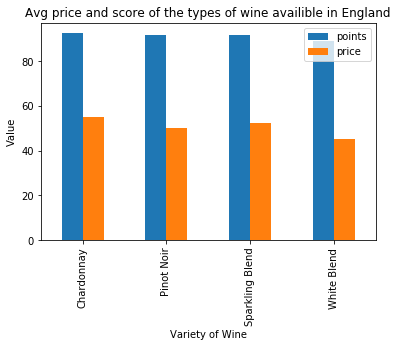

In [29]:
#run cell to upodate graph based on country selected, might want to add some like limit to
#number of selections like top 10 by count or something
df1 = noDups[(noDups['country'] == w.value)]
variety = df1.groupby(['variety']).agg({'winery':'count', 'points': 'mean', 'price':'mean'})

finalBarGraph = pd.concat([variety['points'], variety['price']], axis=1)

finalBarGraph.plot(kind="bar")

plt.xlabel('Variety of Wine')
plt.ylabel('Value')
plt.title("Avg price and score of the types of wine availible in "+ str(w.value))

Our findings were that quality *was* correlated to price, although the positive relationship only seemed to extend to around x/price = 600. After that price point, the increased price was not a sign of increased quality.

We also found that the most common varieties were Pinot Noir, Chardonnay, Cabernet Sauvignon, Red Blend, and Bordeaux-style Red Blend. The most common varieties tended to be on the more expensive side of the spectrum.

Our final findings, related to the countries, found that while the countries that produced the most wines in the dataset were the classic wine powerhouses you would think of (France, Italy, US), the countries that produced the highest quality wine (highest average points) were unexpected countries like Austria, Germany, and Canada.